# Loan Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [5]:
train.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

## Exploratory Data Analysis. Data Exploration and Preparation.

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outliter treatment
6. Variable transformation
7. Variable creation

### 1. Variable Identification

1. Identify predictor and target variables;
2. Identify data type of the variables;
3. Identify category of the variables.

In [6]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### 1. Identify predictor and target variables.

**Predictor variables.**

* Gender
* Married
* Dependents
* Education
* Self_Employed
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* Loan_Amount_Term
* Credit_History
* Property_Area

**Target variable.**

* Loan_Status

#### 2. Identify data type of the variables.

**Character.**

* Gender
* Married
* Education
* Self_Employed
* Property_Area
* Loan_Status

**Numeric.**

* Dependents
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* Loan_Amount_Term
* Credit_History

#### 3. Identify categories of the variables.

**Categorical.**

* Gender
* Married
* Education
* Self_Employed
* Property_Area
* Loan_Status
* Dependents
* Credit_History
* Loan_Amount_Term

**Continuous.**

* ApplicantIncome
* CoapplicantIncome
* LoanAmount

## 2. Univariate Analysis

In [8]:
continuous_variables = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical_variables = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status',
                         'Dependents', 'Credit_History']

### Continuous Variables

In [9]:
train[continuous_variables].describe()

ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000

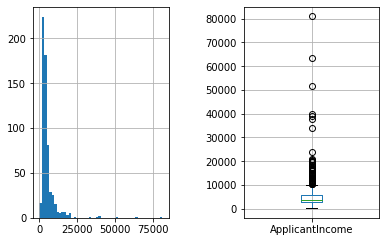

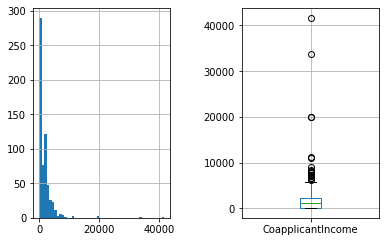

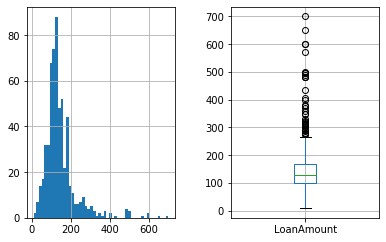

In [10]:
for continuous in continuous_variables: 
    plt.subplot(1, 2, 1);
    train[continuous].hist(bins=50);
    plt.subplot(1, 2, 2);
    train.boxplot(column=[continuous]);
    plt.tight_layout(pad=3.0)
    plt.show()

### Categorical Variables

In [11]:
def analyze_categorical(variable, df):
    counts = pd.concat((df[variable].value_counts(), df[variable].value_counts(normalize=True)), 
              axis=1, keys=('Counts', 'Percentage'))
    print(counts)
    df[variable].value_counts().plot.bar()
    plt.show()

        Counts  Percentage
Male       489    0.813644
Female     112    0.186356


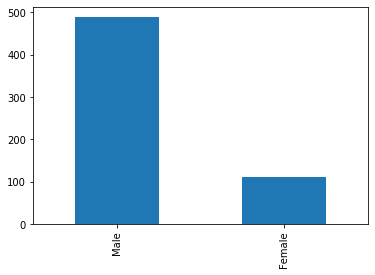

In [12]:
analyze_categorical('Gender', train)

For Gender
        Counts  Percentage
Male       489    0.813644
Female     112    0.186356


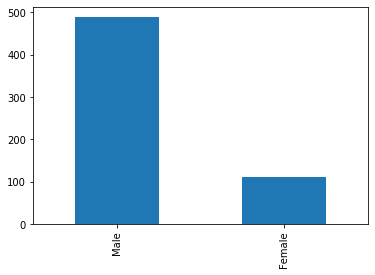

For Married
     Counts  Percentage
Yes     398    0.651391
No      213    0.348609


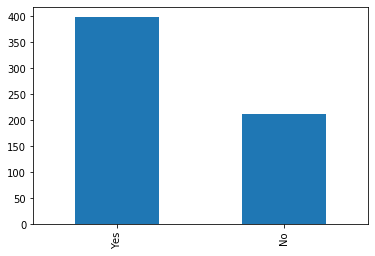

For Education
              Counts  Percentage
Graduate         480    0.781759
Not Graduate     134    0.218241


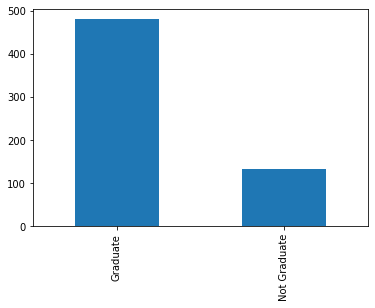

For Self_Employed
     Counts  Percentage
No      500    0.859107
Yes      82    0.140893


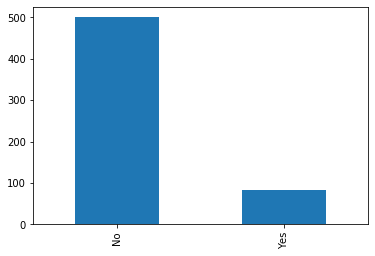

For Property_Area
           Counts  Percentage
Semiurban     233    0.379479
Urban         202    0.328990
Rural         179    0.291531


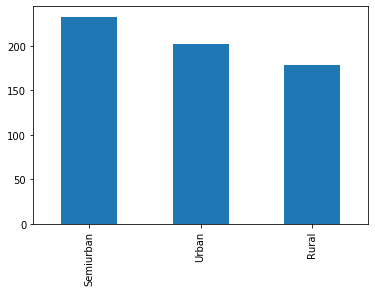

For Loan_Status
   Counts  Percentage
Y     422    0.687296
N     192    0.312704


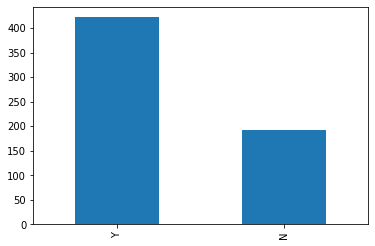

For Dependents
    Counts  Percentage
0      345    0.575960
1      102    0.170284
2      101    0.168614
3+      51    0.085142


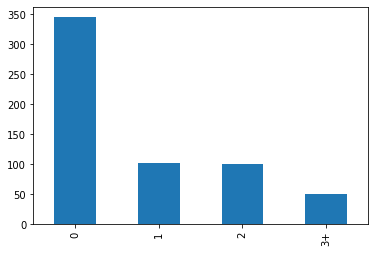

For Credit_History
     Counts  Percentage
1.0     475    0.842199
0.0      89    0.157801


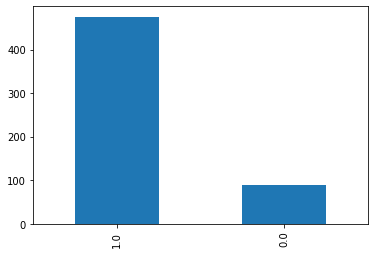

In [13]:
for variable in categorical_variables:
    print(f'For {variable}')
    analyze_categorical(variable, train)

In [14]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

## Bivariate Analysis

Strategy for each combination of variable categories.

* Continuous and continuous. Scatter plot and correlation.
* Categorical and categorical. Stacked column chart and chi-square test.
* Categorical and continuous. Box plot and Z-test, T-test or ANOVA.

### Continuous and continuous

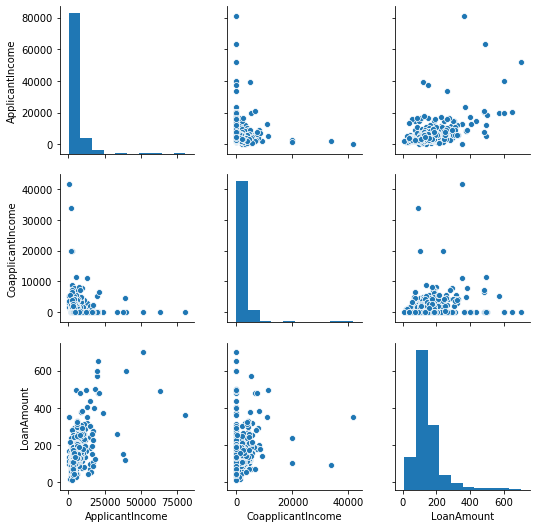

In [15]:
sns.pairplot(train[continuous_variables]);

#### Correlation

[Consulted link](https://www.geeksforgeeks.org/python-pandas-dataframe-corr/)

In [31]:
train[continuous_variables].corr(method="pearson")

ApplicantIncome  CoapplicantIncome  LoanAmount
ApplicantIncome           1.000000          -0.116605    0.570909
CoapplicantIncome        -0.116605           1.000000    0.188619
LoanAmount                0.570909           0.188619    1.000000

### Categorical and categorical

In [16]:
def generate_two_way_data(cat1, cat2, df):
    gender_table = pd.crosstab(index=df[cat1],
                               columns=df[cat2],
                               normalize="index")
    print(gender_table)
    gender_table.plot(kind="bar", figsize=(4,4), stacked=False);
    plt.show();

In [33]:
gender_table = pd.crosstab(index=train['Loan_Status'],
                           columns=train['Gender'])
gender_table

Gender       Female  Male
Loan_Status              
N                37   150
Y                75   339

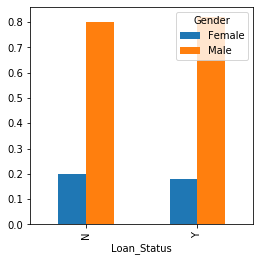

In [18]:
gender_table.plot(kind="bar", figsize=(4,4), stacked=False);

Married            No       Yes
Loan_Status                    
N            0.411458  0.588542
Y            0.319809  0.680191


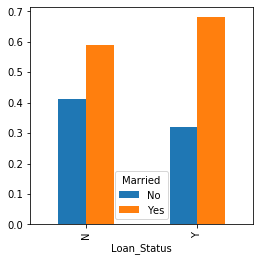

In [19]:
generate_two_way_data('Loan_Status', 'Married', train)

Education    Graduate  Not Graduate
Loan_Status                        
N            0.729167      0.270833
Y            0.805687      0.194313


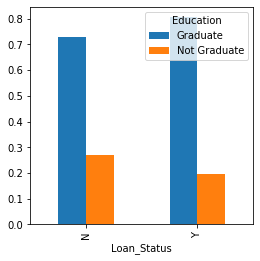

In [20]:
generate_two_way_data('Loan_Status', 'Education', train)

Self_Employed        No       Yes
Loan_Status                      
N              0.857923  0.142077
Y              0.859649  0.140351


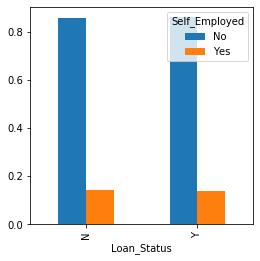

In [21]:
generate_two_way_data('Loan_Status', 'Self_Employed', train)

Property_Area     Rural  Semiurban     Urban
Loan_Status                                 
N              0.359375   0.281250  0.359375
Y              0.260664   0.424171  0.315166


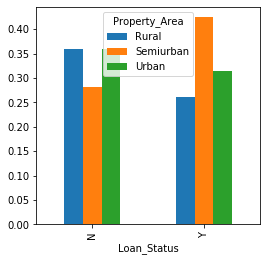

In [22]:
generate_two_way_data('Loan_Status', 'Property_Area', train)

Dependents          0         1         2        3+
Loan_Status                                        
N            0.575269  0.193548  0.134409  0.096774
Y            0.576271  0.159806  0.184019  0.079903


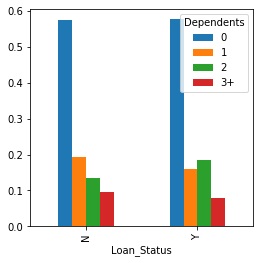

In [23]:
generate_two_way_data('Loan_Status', 'Dependents', train)

Credit_History       0.0       1.0
Loan_Status                       
N               0.458101  0.541899
Y               0.018182  0.981818


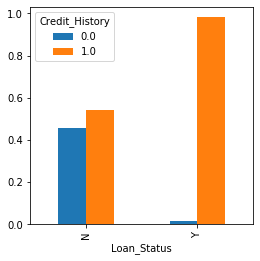

In [24]:
generate_two_way_data('Loan_Status', 'Credit_History', train)

Loan_Amount_Term     12.0      36.0      60.0      84.0      120.0     180.0  \
Loan_Status                                                                    
N                 0.000000  0.010753  0.000000  0.005376  0.000000  0.080645   
Y                 0.002415  0.000000  0.004831  0.007246  0.007246  0.070048   

Loan_Amount_Term     240.0     300.0     360.0     480.0  
Loan_Status                                               
N                 0.005376  0.026882  0.822581  0.048387  
Y                 0.007246  0.019324  0.867150  0.014493  


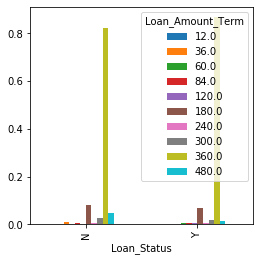

In [25]:
generate_two_way_data('Loan_Status', 'Loan_Amount_Term', train)

#### Chi-squared test

[Consulted link](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

In [35]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table
table = np.array(gender_table)
print(table)

stat, p, dof, expected = chi2_contingency(table)
print("dof=%d" % dof)
print(expected)

# interpret test statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print("probability=%.3f, critical=%.3f, stat=%.3f" % (prob, critical, stat))

if abs(stat) >= critical:
    print("Dependent (reject H0)")
else:
    print("Independent (failt to reject H0)")
    
# interpret p-value
alpha = 1.0 - prob
print("significance=%.3f, p=%.3f" % (alpha, p))
if p <= alpha:
    print("Dependent (reject H0)")
else:
    print("Independent (failt to reject H0)")

[[ 37 150]
 [ 75 339]]
dof=1
[[ 34.84858569 152.15141431]
 [ 77.15141431 336.84858569]]
probability=0.950, critical=3.841, stat=0.140
Independent (failt to reject H0)
significance=0.050, p=0.709
Independent (failt to reject H0)


In [36]:
def report_chi_squared_test(cat1, cat2, df):
    # calculate contingency table for the two categorical variables
    table = pd.crosstab(index=df[cat1],
                           columns=df[cat2])
    stat, p, dof, expected = chi2_contingency(table)
    # interpret test statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print("probability=%.3f, critical=%.3f, stat=%.3f" % (prob, critical, stat))

    if abs(stat) >= critical:
        print("Dependent (reject H0)")
    else:
        print("Independent (failt to reject H0)")

    # interpret p-value
    alpha = 1.0 - prob
    print("significance=%.3f, p=%.3f" % (alpha, p))
    if p <= alpha:
        print("Dependent (reject H0)")
    else:
        print("Independent (failt to reject H0)")

In [37]:
report_chi_squared_test('Loan_Status', 'Gender', train)

probability=0.950, critical=3.841, stat=0.140
Independent (failt to reject H0)
significance=0.050, p=0.709
Independent (failt to reject H0)


In [38]:
report_chi_squared_test('Loan_Status', 'Married', train)

probability=0.950, critical=3.841, stat=4.475
Dependent (reject H0)
significance=0.050, p=0.034
Dependent (reject H0)


Based on the results of the Chi-square test, we can observe that gender is not an important variable, while if the person is married or not is an important information.

In [39]:
report_chi_squared_test('Loan_Status', 'Credit_History', train)

probability=0.950, critical=3.841, stat=174.637
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


As observed in the frequency table, we can confirm the importance to predict the loan status given the credit history given the chi-square test.

### Categorical and continuous

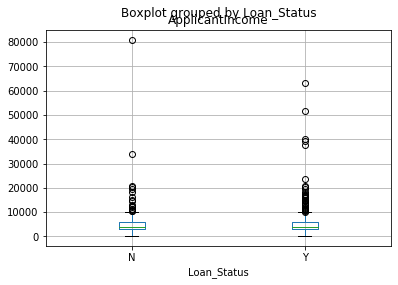

In [26]:
train.boxplot(by="Loan_Status", column=["ApplicantIncome"]);

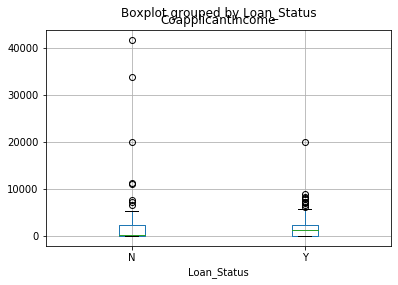

In [27]:
train.boxplot(by="Loan_Status", column=["CoapplicantIncome"]);

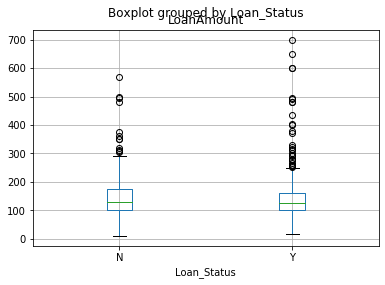

In [28]:
train.boxplot(by="Loan_Status", column=["LoanAmount"]);